# Exploratory Data Analysis

In [2]:
import random
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
import used_cars

In [3]:
sb.set_theme()
pd.set_option('display.max_columns', None)

## Import Cleaned Dataset

In [5]:
df = pd.read_csv("../Datasets/cleaned_used_cars_dataset.csv")

In [6]:
# refers to numerical variables
num_var = ['back_legroom', 'city_fuel_economy', 'daysonmarket', 'engine_displacement', 'front_legroom', 
           'fuel_tank_volume', 'height', 'highway_fuel_economy', 'length', 'mileage', 'price',
           'seller_rating', 'torque', 'width', 'car_age', 'powerRPM', 'torqueRPM', 'savings_amount', 'horsepower']

# refers to binary categorical variables
binary_var = ['fleet', 'frame_damaged', 'franchise_dealer', 'has_accidents', 'isCab', 'is_cpo', 'salvage',
       'is_new', 'is_oemcpo', 'theft_title']

# refers to non-binary categorical variables
non_binary_var = ['bed', 'body_type', 'cabin', 'engine_type','franchise_make',
                  'fuel_type', 'maximum_seating', 'owner_count', 'transmission','wheel_system']

In [31]:
display(df[num_var].head())
display(df[binary_var].head())
display(df[non_binary_var].head())

,back_legroom,city_fuel_economy,daysonmarket,engine_displacement,front_legroom,fuel_tank_volume,height,highway_fuel_economy,length,mileage,price,seller_rating,torque,width,car_age,powerRPM,torqueRPM,savings_amount,horsepower
0,33.7,20.000000,3.0,2500.0,43.6,15.0,62.6,25.00000,176.6,163512.0,5794.0,4.611111,166.0,68.3,14.0,6000.0,4400.0,505.0,173.0
1,38.5,21.000000,20.0,2400.0,41.3,15.3,66.1,27.00000,179.3,131031.0,11495.0,4.280081,161.0,71.6,9.0,6800.0,4400.0,1219.0,180.0
2,35.1,20.797158,12.0,2000.0,41.3,15.3,54.6,28.26586,186.3,34941.0,35998.0,5.000000,273.0,79.9,2.0,5000.0,1600.0,1643.0,252.0
3,40.4,27.000000,31.0,1500.0,41.3,14.0,66.5,33.00000,180.6,23755.0,25752.0,3.750000,179.0,73.0,3.0,5600.0,2000.0,115.0,190.0
4,39.4,18.000000,35.0,3300.0,44.1,18.8,66.5,25.00000,187.4,49023.0,24988.0,4.250000,252.0,74.4,3.0,6400.0,5300.0,143.0,290.0


,fleet,frame_damaged,franchise_dealer,has_accidents,isCab,is_cpo,salvage,is_new,is_oemcpo,theft_title
0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,1,0


,bed,body_type,cabin,engine_type,franchise_make,fuel_type,maximum_seating,owner_count,transmission,wheel_system
0,none,SUV / Crossover,none,H4,Subaru,Gasoline,5.0,2.0,A,AWD
1,none,SUV / Crossover,none,I4,none,Gasoline,5.0,3.0,A,AWD
2,none,Sedan,none,I4,none,Gasoline,5.0,1.0,A,AWD
3,none,SUV / Crossover,none,I4,Honda,Gasoline,5.0,1.0,CVT,AWD
4,none,SUV / Crossover,none,V6,Kia,Gasoline,7.0,1.0,A,FWD


## Plot of price

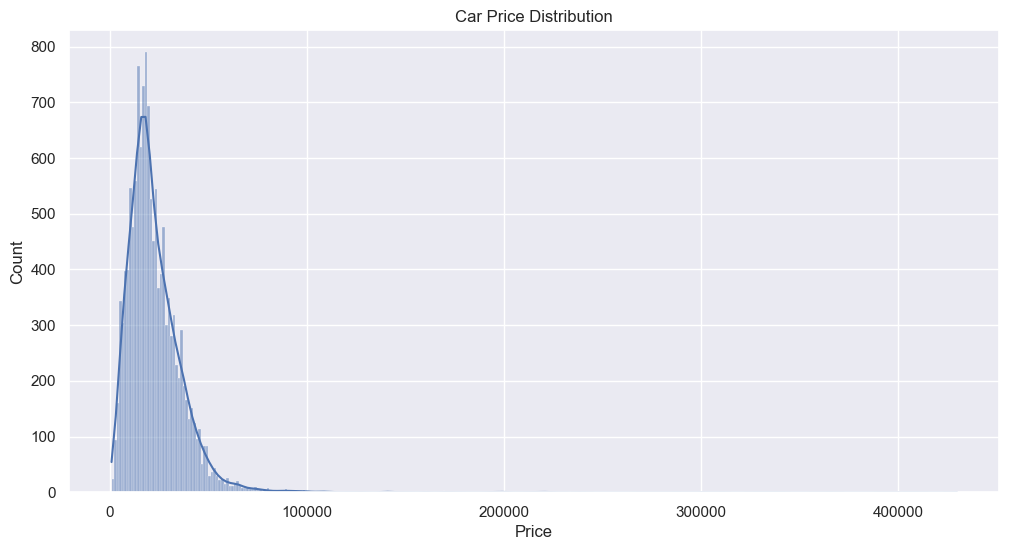

In [12]:
sb.set_theme("notebook", "darkgrid", font_scale=1, 
             rc={"lines.linewidth": 1.5, "figure.figsize": (12, 6)})
ax = sb.histplot(df, x="price", kde=True)
ax.set_title("Car Price Distribution")
ax.set_xlabel("Price")
plt.show()

In [60]:
df["price"].describe()

count     13258.000000
mean      23059.259428
std       16985.013512
min         900.000000
25%       13888.000000
50%       19941.500000
75%       29213.500000
max      429900.000000
Name: price, dtype: float64

In [64]:
cols = [
    "franchise_make", "make_name", "body_type", "engine_type", "fuel_type", 
    "horsepower", "listing_color"
]
df_sorted = df.sort_values("price")[cols + ["car_age", "price"]]
display(df_sorted.head())
display(df_sorted.tail())

,franchise_make,make_name,body_type,engine_type,fuel_type,horsepower,listing_color,car_age,price
8072,Chevrolet,Pontiac,Sedan,V6,Gasoline,205.0,BLACK,20.0,900.0
13225,Nissan,Buick,SUV / Crossover,V6,Gasoline,185.0,UNKNOWN,17.0,900.0
379,none,Lexus,Sedan,V6,Gasoline,210.0,GRAY,21.0,995.0
11933,none,Oldsmobile,Sedan,I4,Gasoline,140.0,BLACK,17.0,999.0
4504,none,Mercury,Sedan,V8,Gasoline,200.0,BLUE,20.0,1000.0


,franchise_make,make_name,body_type,engine_type,fuel_type,horsepower,listing_color,car_age,price
11507,Ferrari,Ferrari,Coupe,V8,Gasoline,597.0,UNKNOWN,5.0,339988.0
10768,Ferrari,Ferrari,Coupe,V12,Gasoline,789.0,UNKNOWN,0.0,366995.0
7015,none,Porsche,Coupe,H6,Gasoline,700.0,BLUE,2.0,389900.0
2699,none,Mercedes-Benz,Coupe,V8,Gasoline,583.0,BLACK,6.0,409900.0
9969,Ferrari,Ferrari,Coupe,V8,Gasoline,711.0,RED,1.0,429900.0


## EDA of categorical variables
### Plots of similar variables

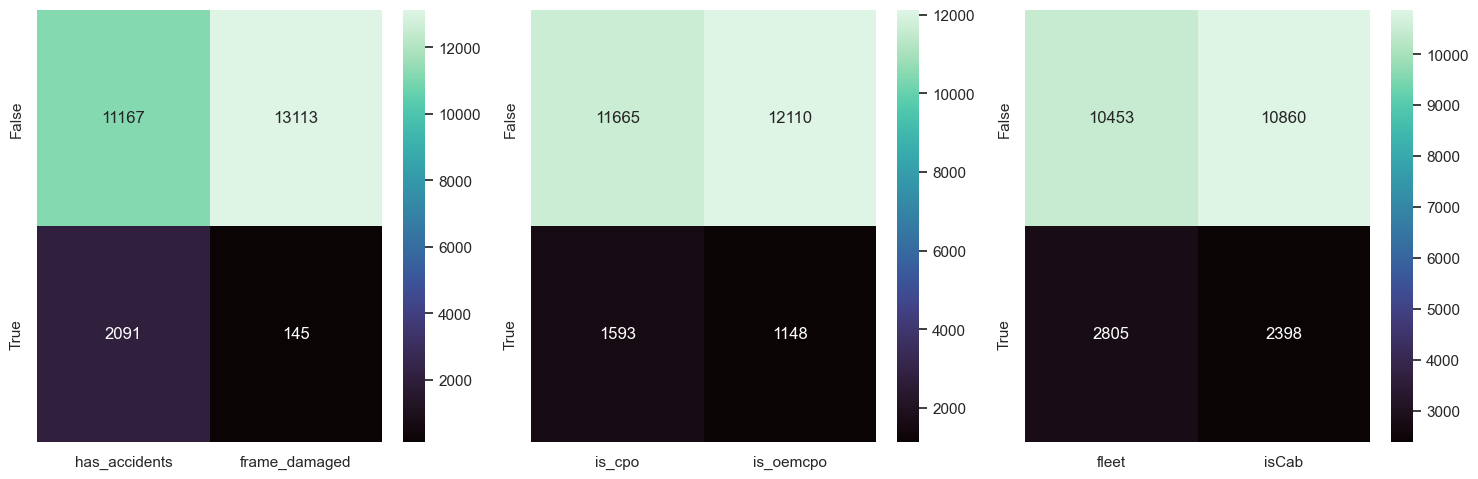

In [19]:
f, axes = plt.subplots(1, 3, figsize=(15, 5))
f.tight_layout()
sb.set_theme("notebook", "darkgrid", font_scale=1)
sb.heatmap(df[['has_accidents', 'frame_damaged']].apply(pd.value_counts), cmap="mako", 
           annot=True, fmt='g', ax = axes[0])
sb.heatmap(df[['is_cpo', 'is_oemcpo']].apply(pd.value_counts), cmap="mako", 
           annot=True, fmt='g', ax = axes[1])
sb.heatmap(df[['fleet', 'isCab']].apply(pd.value_counts), cmap="mako", 
           annot=True, fmt='g', ax = axes[2])
plt.show()

### Plots of categorical variables against Price

Number of fleet is True:  2805
Number of frame_damaged is True:  145
Number of franchise_dealer is True:  8500
Number of has_accidents is True:  2091
Number of isCab is True:  2398
Number of is_cpo is True:  1593
Number of salvage is True:  105
Number of is_new is True:  283
Number of is_oemcpo is True:  1148
Number of theft_title is True:  46


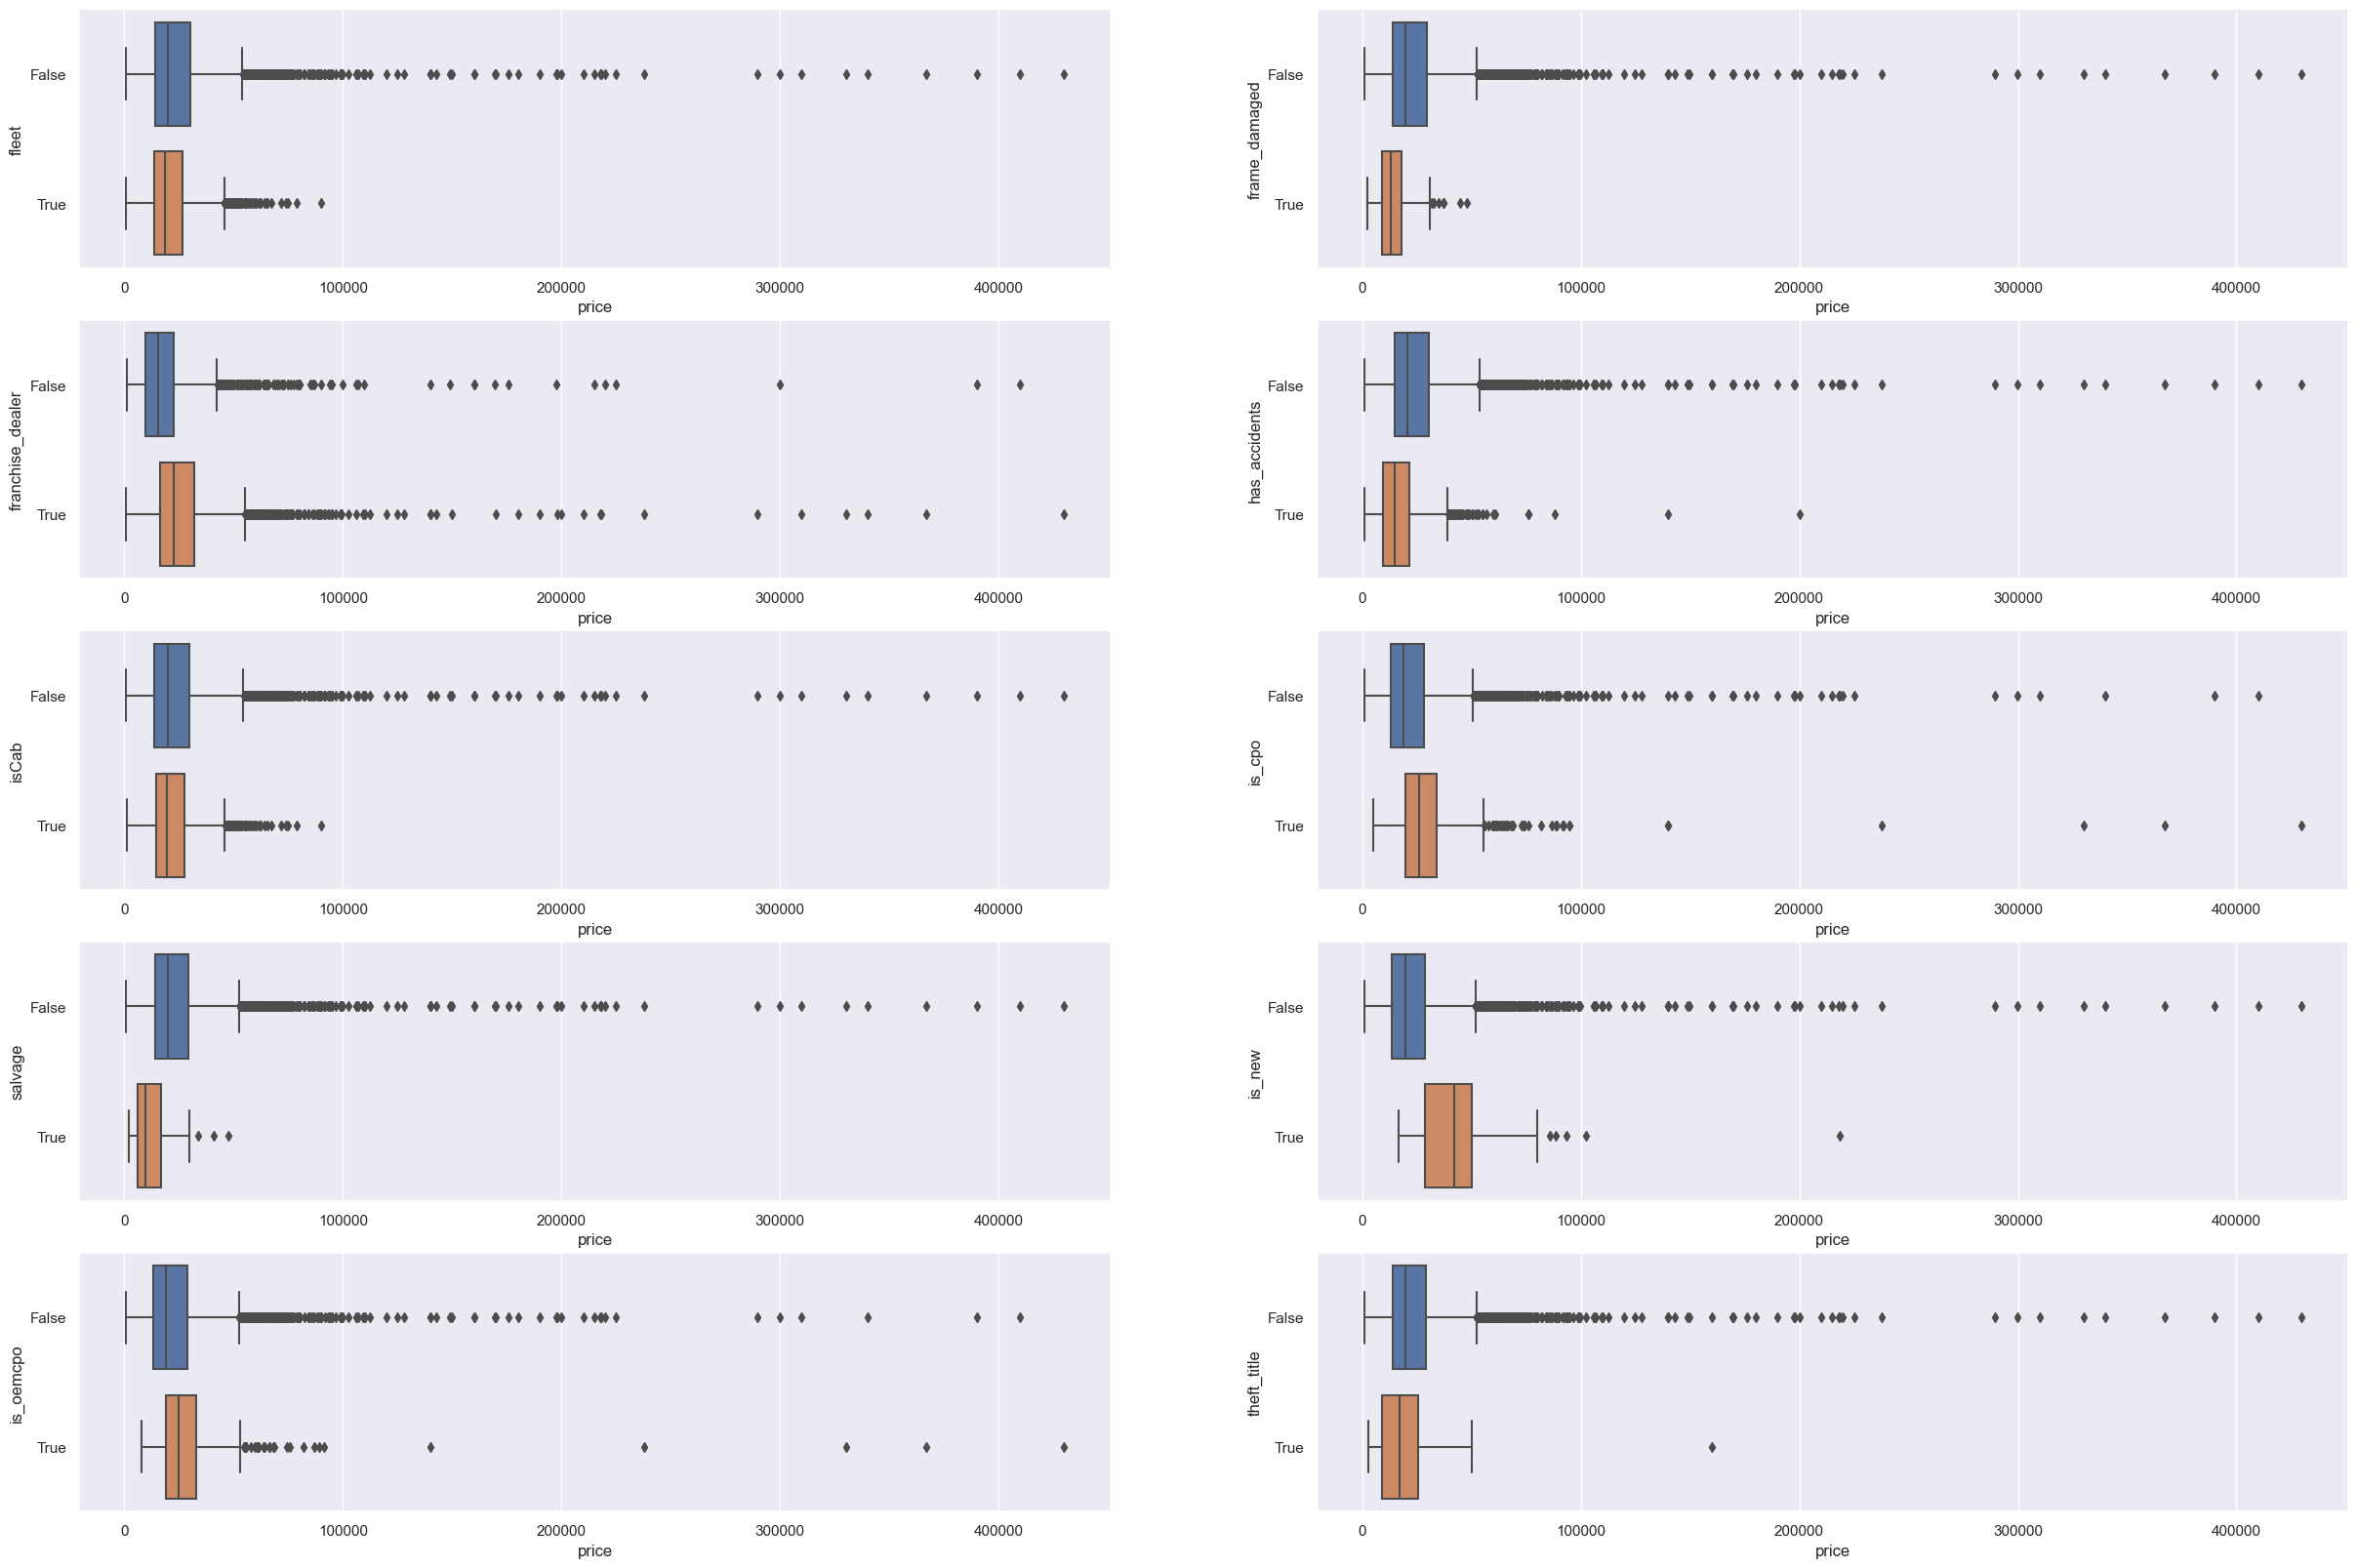

In [20]:
f, axes = plt.subplots(5, 2, figsize=(30, 20))
sb.set_theme("notebook", "darkgrid")
for i in range(5):
    for j in range(2):
        var = binary_var[j + i * 2]
        df[var] = df[var].astype("category")
        print(f"Number of {var} is True: ", df[df[var] == True].shape[0])
        sb.boxplot(data=df, x="price", y=var, ax = axes[i,j])

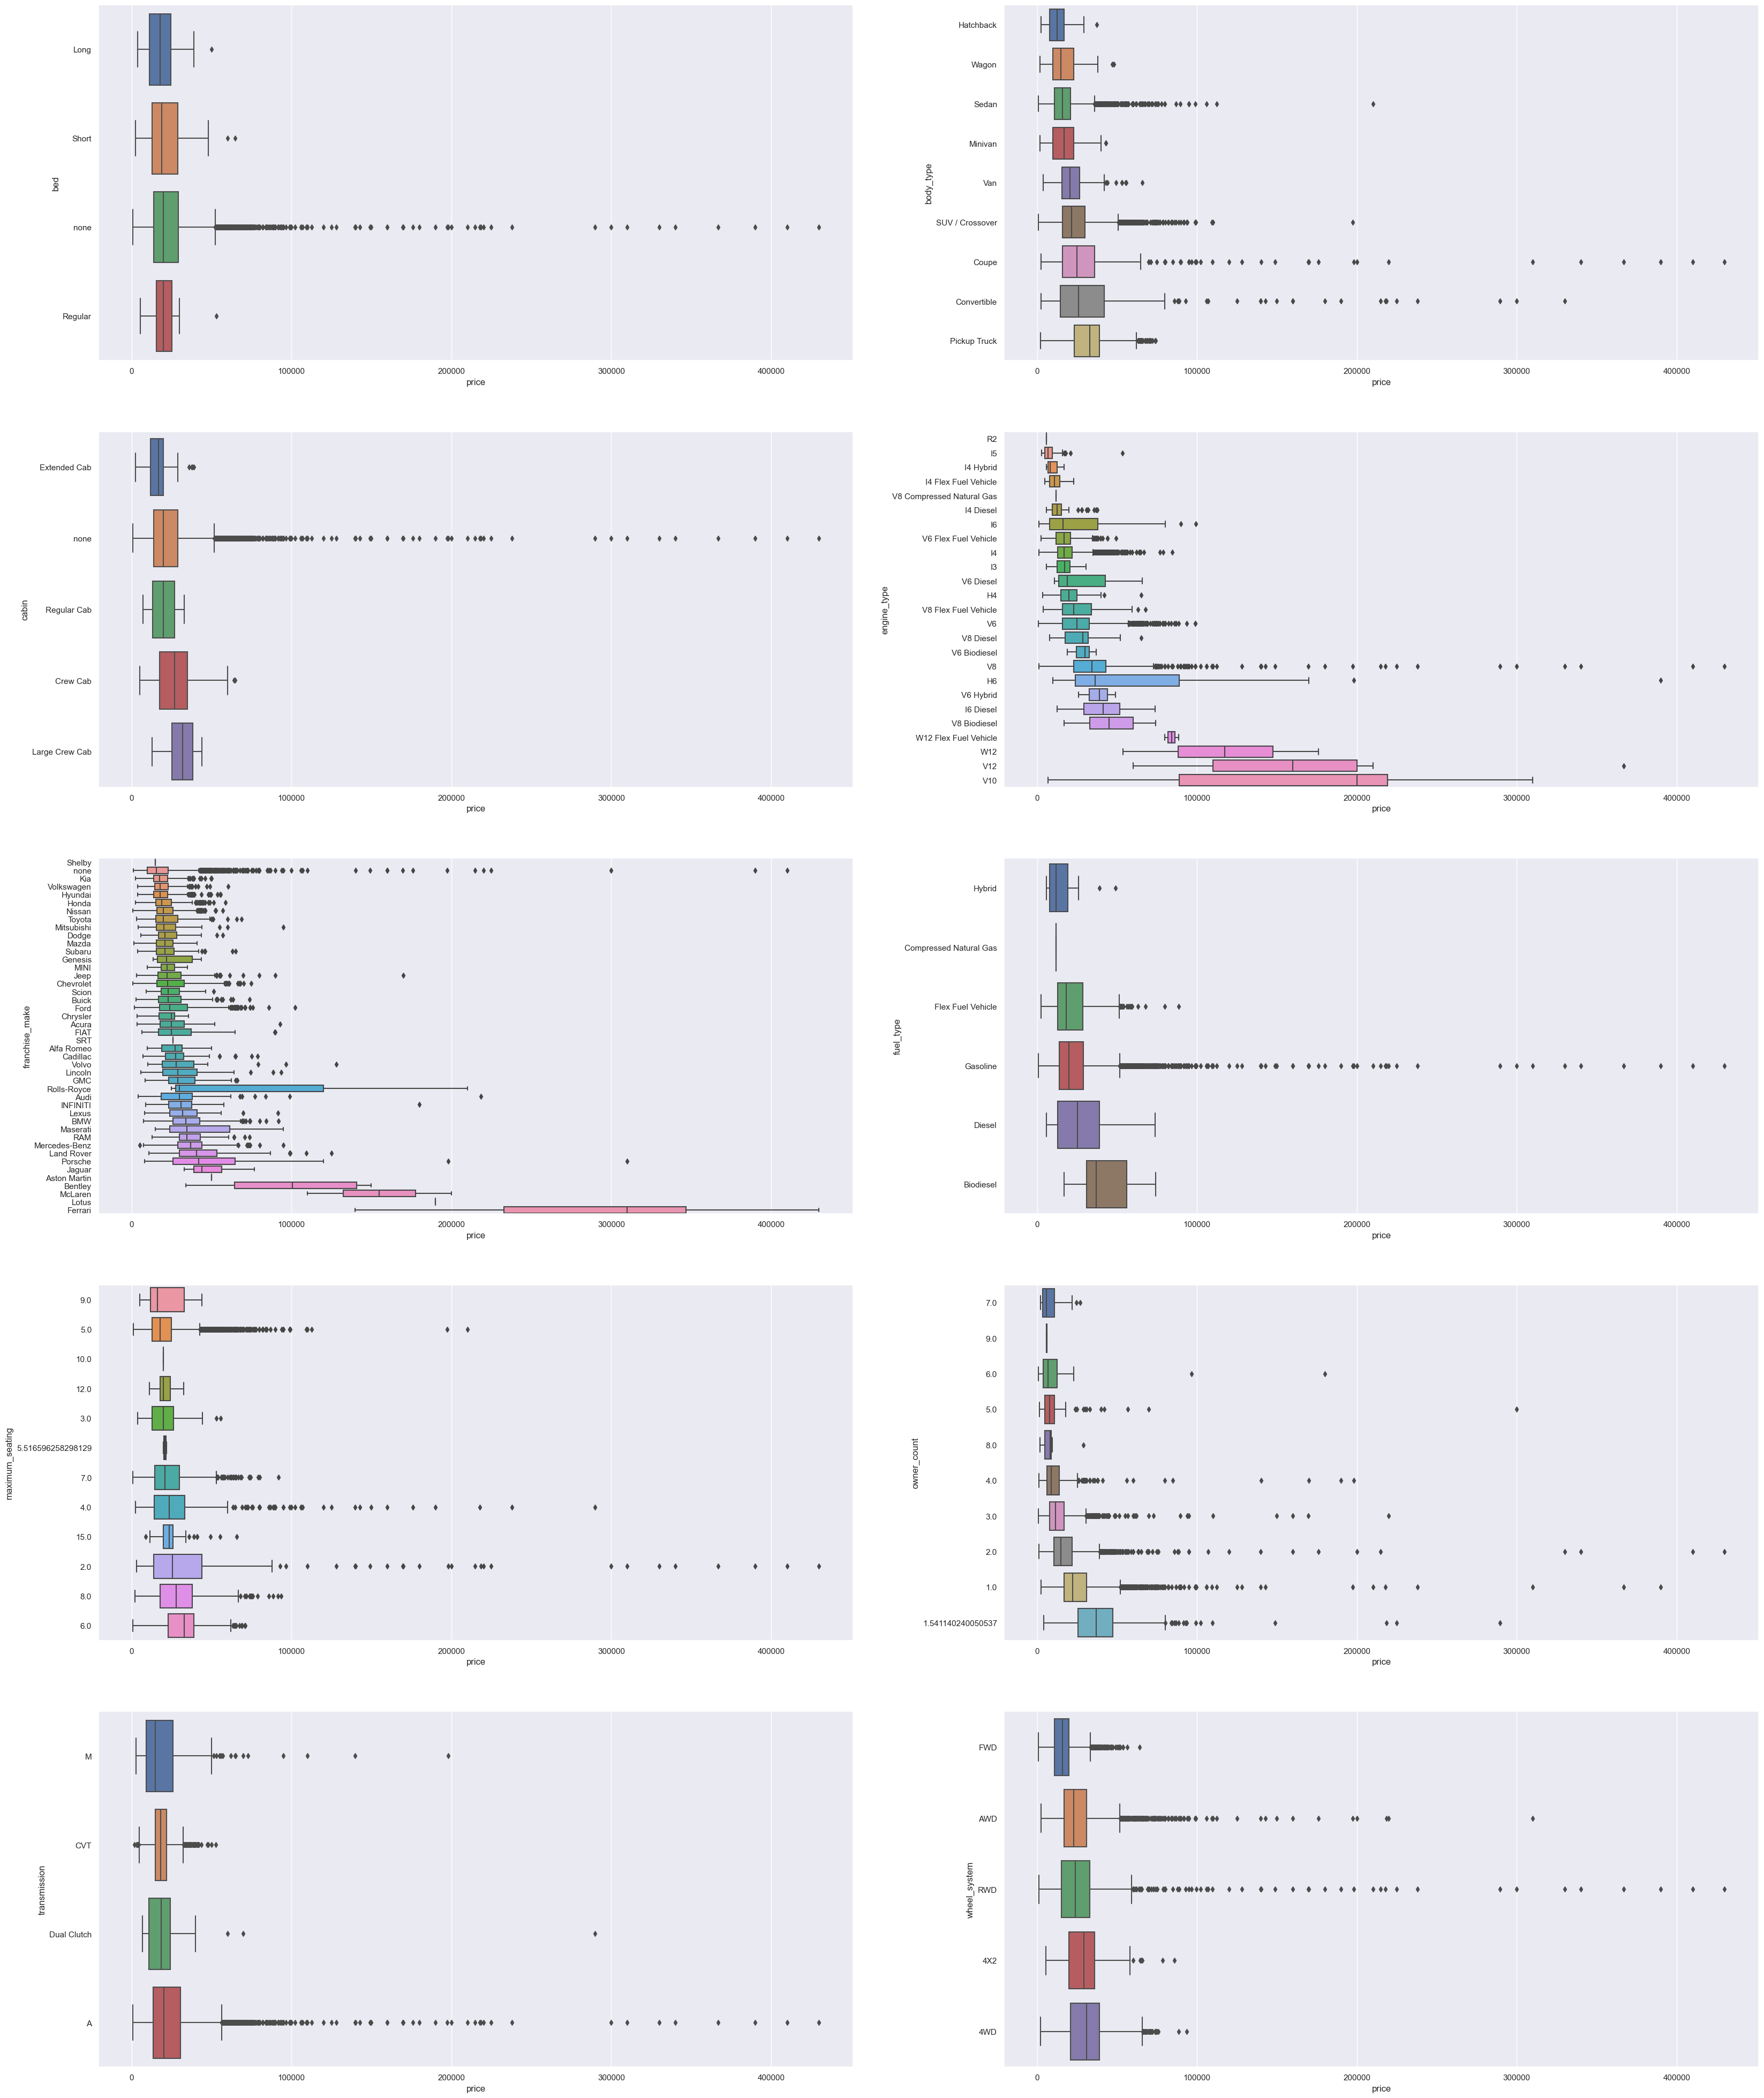

In [26]:
f, axes = plt.subplots(len(non_binary_var)//2, 2, figsize=(40, 50))
sb.set_theme("notebook", "darkgrid", font_scale=1)
for i in range(len(non_binary_var)//2):
    for j in range(2):
        if i == 5 and j == 1:
            break
        var = non_binary_var[j + i * 2]
        df[var] = df[var].astype("category")
        sb.boxplot(
            data=df, x="price", y=var, 
            order=df.groupby(var)["price"].median().sort_values().index, ax=axes[i, j]
        )

## Label Encoding of Binary Values

In [28]:
labEnc_list = binary_var

In [29]:
for item in labEnc_list:
    print(item)
    
    print(df[item].unique())
    print()

fleet
[False, True]
Categories (2, bool): [False, True]

frame_damaged
[False, True]
Categories (2, bool): [False, True]

franchise_dealer
[True, False]
Categories (2, bool): [False, True]

has_accidents
[False, True]
Categories (2, bool): [False, True]

isCab
[False, True]
Categories (2, bool): [False, True]

is_cpo
[False, True]
Categories (2, bool): [False, True]

salvage
[False, True]
Categories (2, bool): [False, True]

is_new
[False, True]
Categories (2, bool): [False, True]

is_oemcpo
[False, True]
Categories (2, bool): [False, True]

theft_title
[False, True]
Categories (2, bool): [False, True]



In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
# creating instance of LabelEncoder
labelencoder = LabelEncoder()

df[labEnc_list] = df[labEnc_list].apply(LabelEncoder().fit_transform)
df[labEnc_list].head()

,fleet,frame_damaged,franchise_dealer,has_accidents,isCab,is_cpo,salvage,is_new,is_oemcpo,theft_title
0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,1,0


## Encoding of Non-Binary Values
We one-hot encode the features before doing PCA on each newly encoded column.

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [36]:
encoders = dict()
pcas = dict()

# Fitting
for var in non_binary_var:
  encoder = OneHotEncoder(handle_unknown="ignore")
  encoder.fit(df[[var]])
  encoders[var] = encoder

  col_encoded = encoder.transform(df[[var]])
  col_encoded_df = pd.DataFrame(
      data=col_encoded.toarray(),
      columns=encoder.get_feature_names_out([var])
  )

  pca = PCA(1, random_state=0)
  pca.fit(col_encoded_df)
  pcas[var] = pca

# Transforming
for var in non_binary_var:
  encoder = encoders[var]
  col_encoded = encoder.transform(df[[var]])
  col_encoded_df = pd.DataFrame(
      data=col_encoded.toarray(),
      columns=encoder.get_feature_names_out([var])
  )

  pca = pcas[var]
  col_encoded_df = pd.DataFrame(
      data=pca.transform(col_encoded_df),
      index=df.index,
      columns=[f"{var}_encoded_1"]
  )
  df = pd.concat([df, col_encoded_df], axis=1)

## EDA of numerical variables

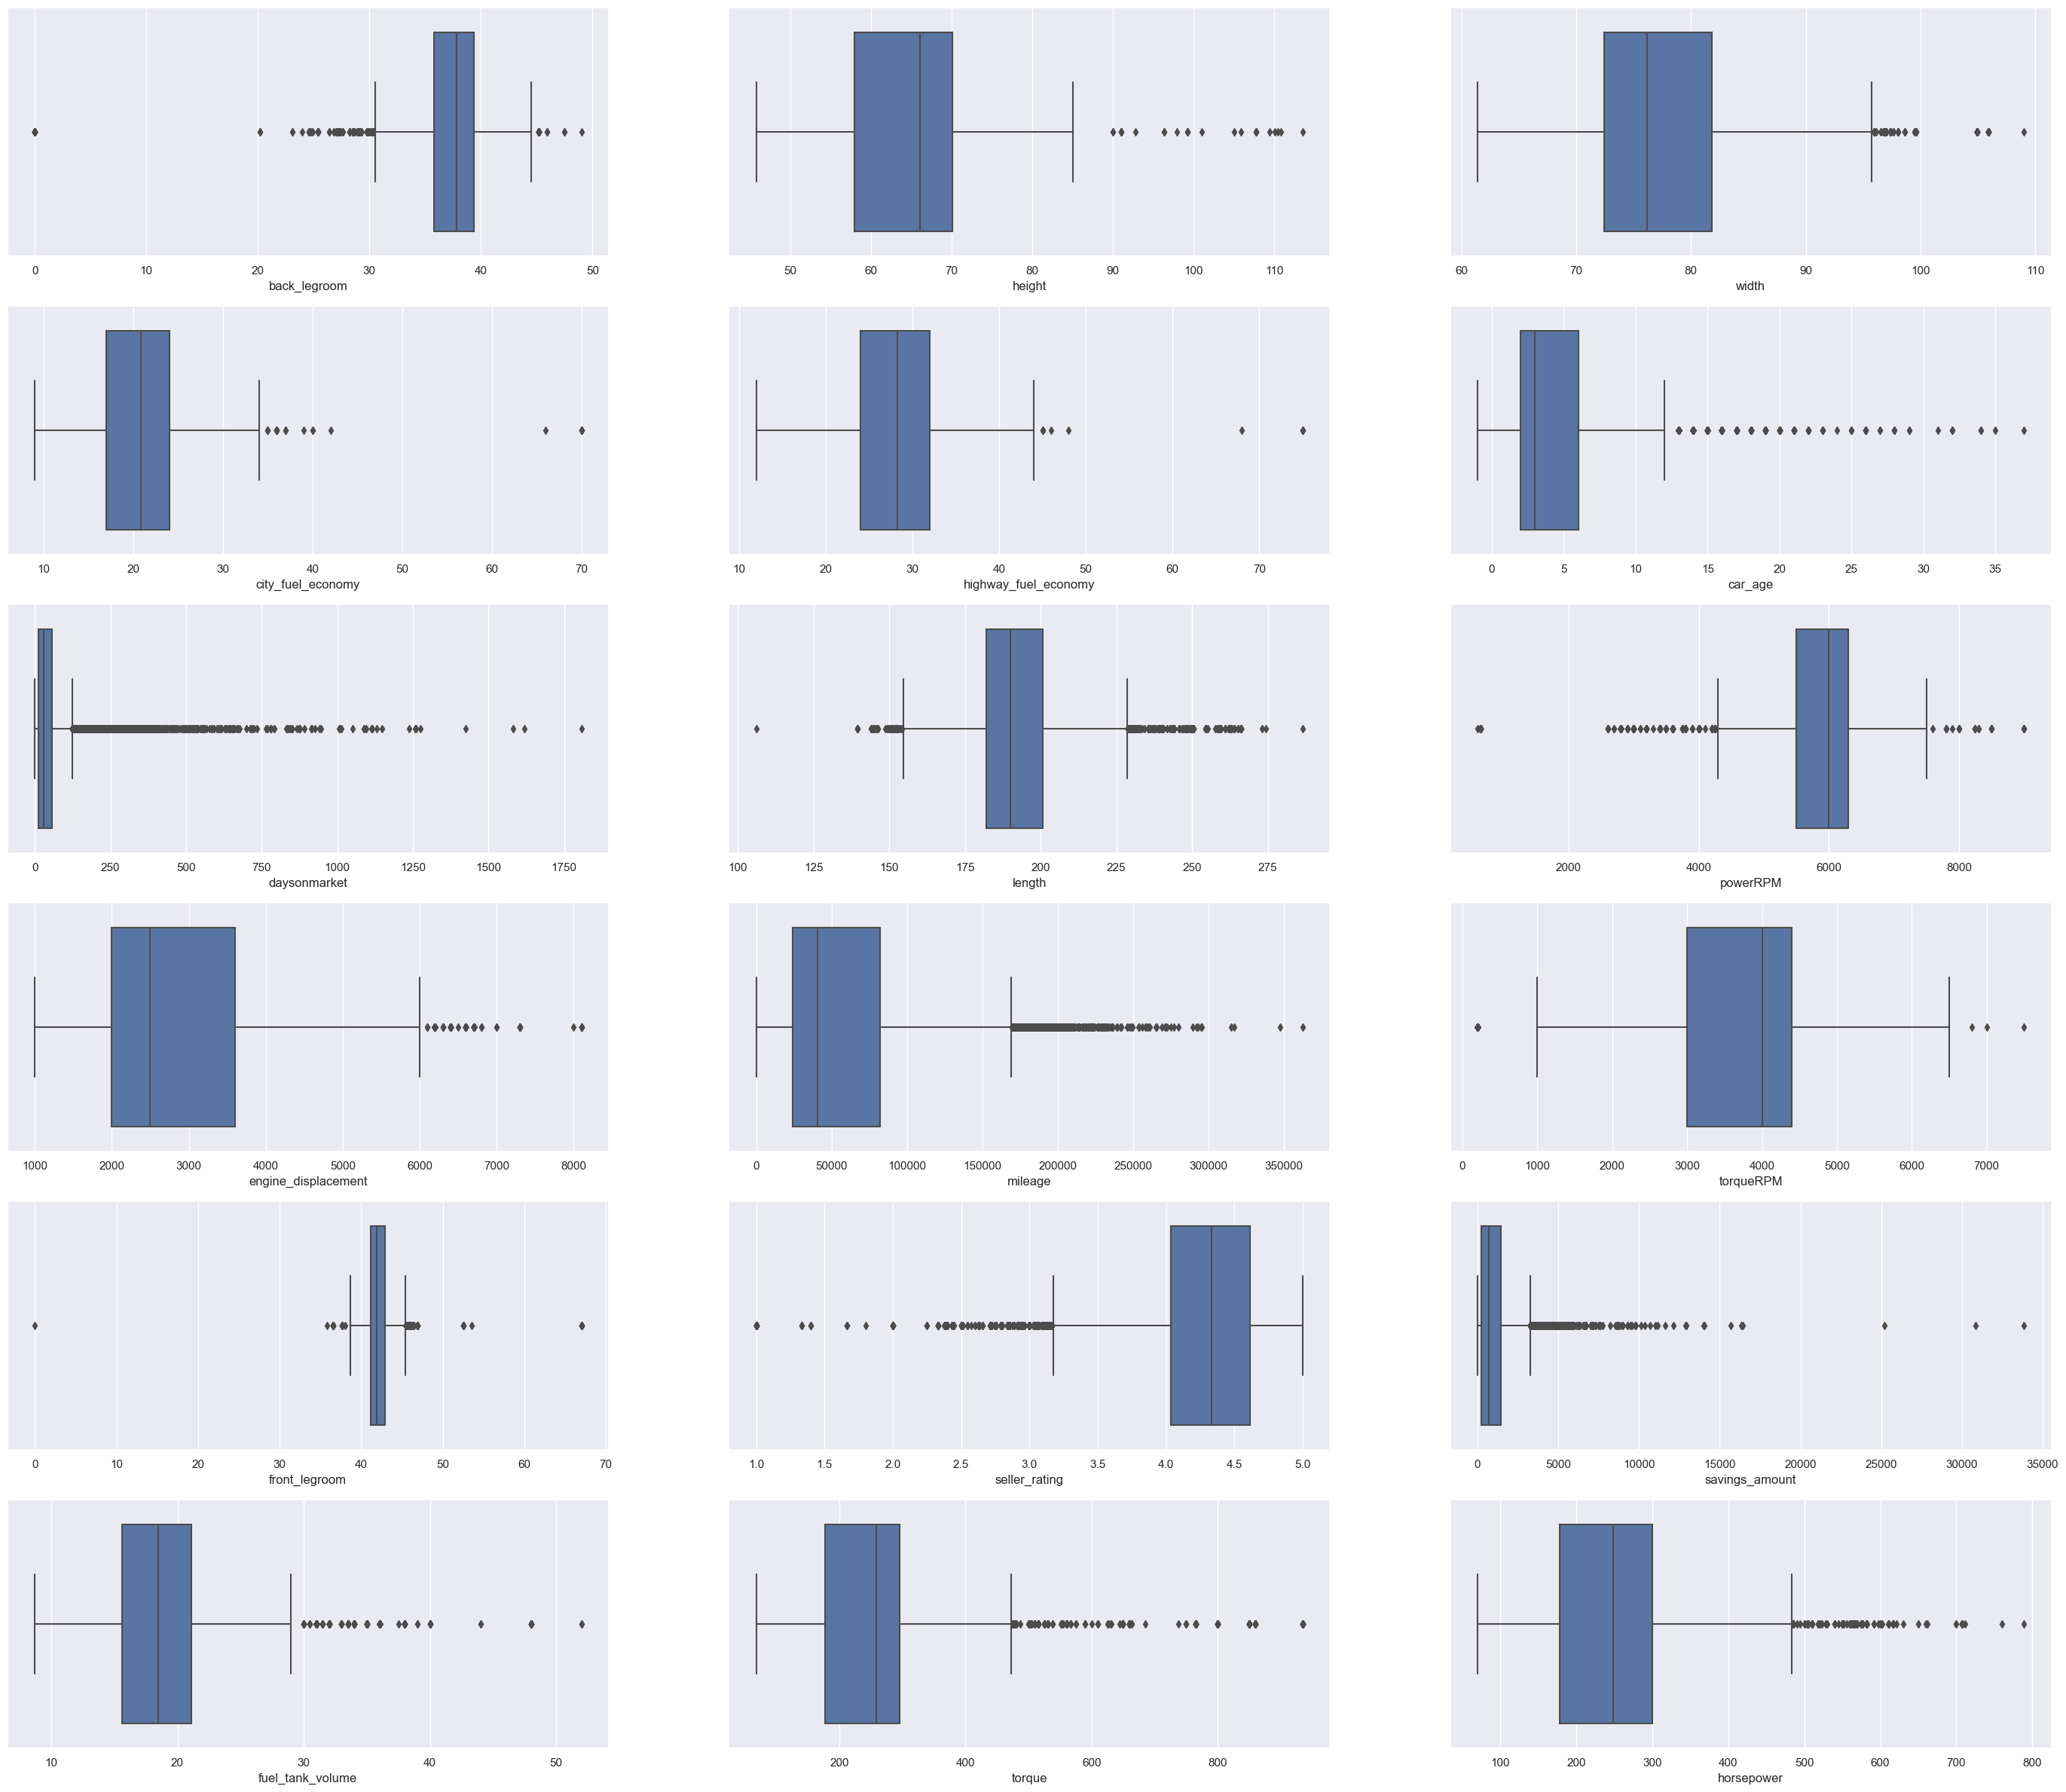

In [38]:
f, axes = plt.subplots(6, 3, figsize=(35, 30))
sb.set_theme("notebook", "darkgrid", font_scale=1)
for j in range(0,3):
    for i in range(0,6):
        var_name = df[num_var].drop(columns = ['price']).columns[i + 6 * j]
        sb.boxplot(x = df[num_var][var_name], data = df, orient = "h", ax = axes[i, j])

### Plots of numerical variables' correlation with price

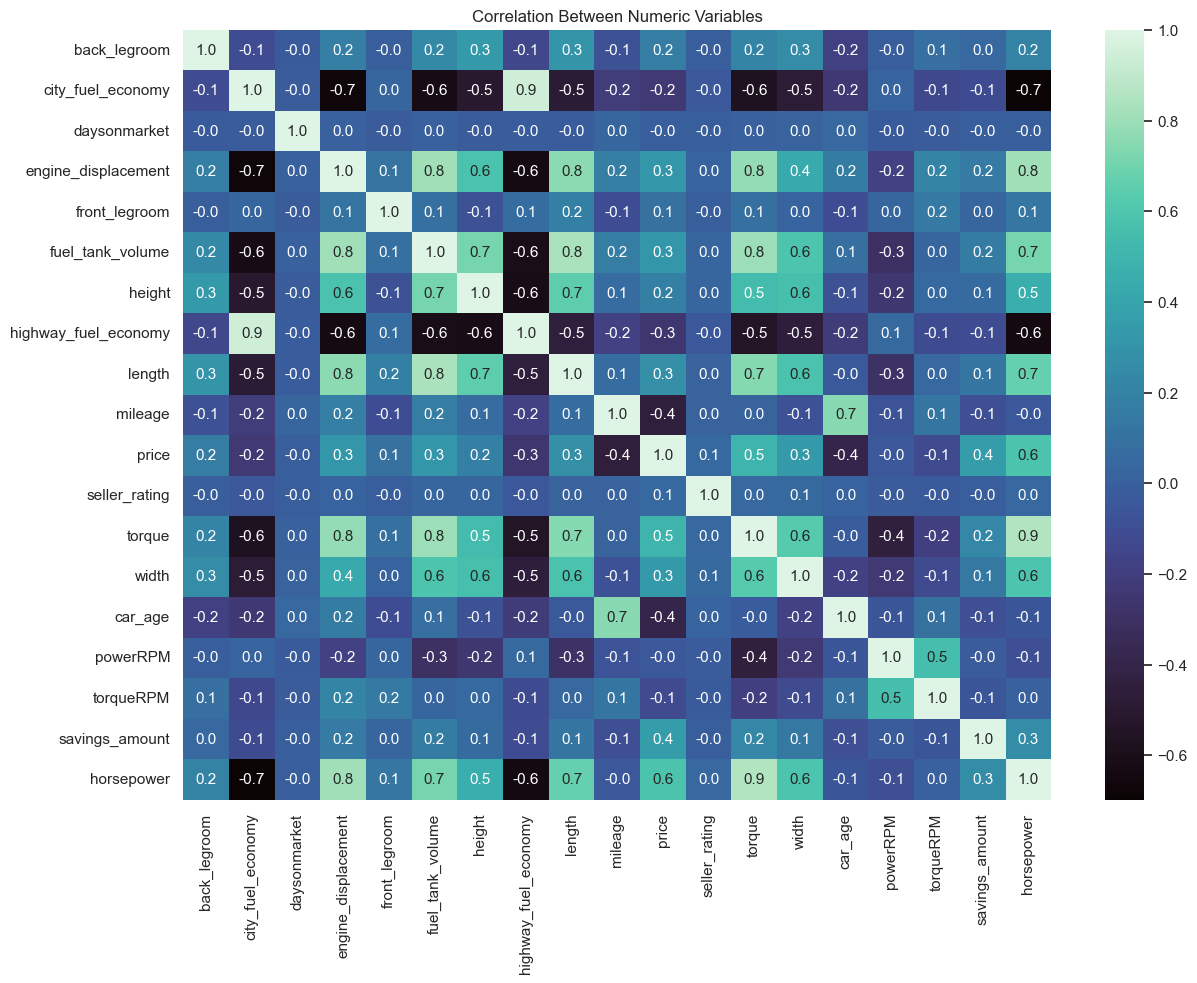

In [43]:
sb.set_theme("notebook", "darkgrid", font_scale=1, 
             rc={"figure.figsize": (14, 10)})
sb.heatmap(
    df[num_var].corr(), annot=True, fmt=".1f",
    annot_kws={"size": 11}, cmap="mako"
).set_title("Correlation Between Numeric Variables")
plt.show()

### Plots of similar variables

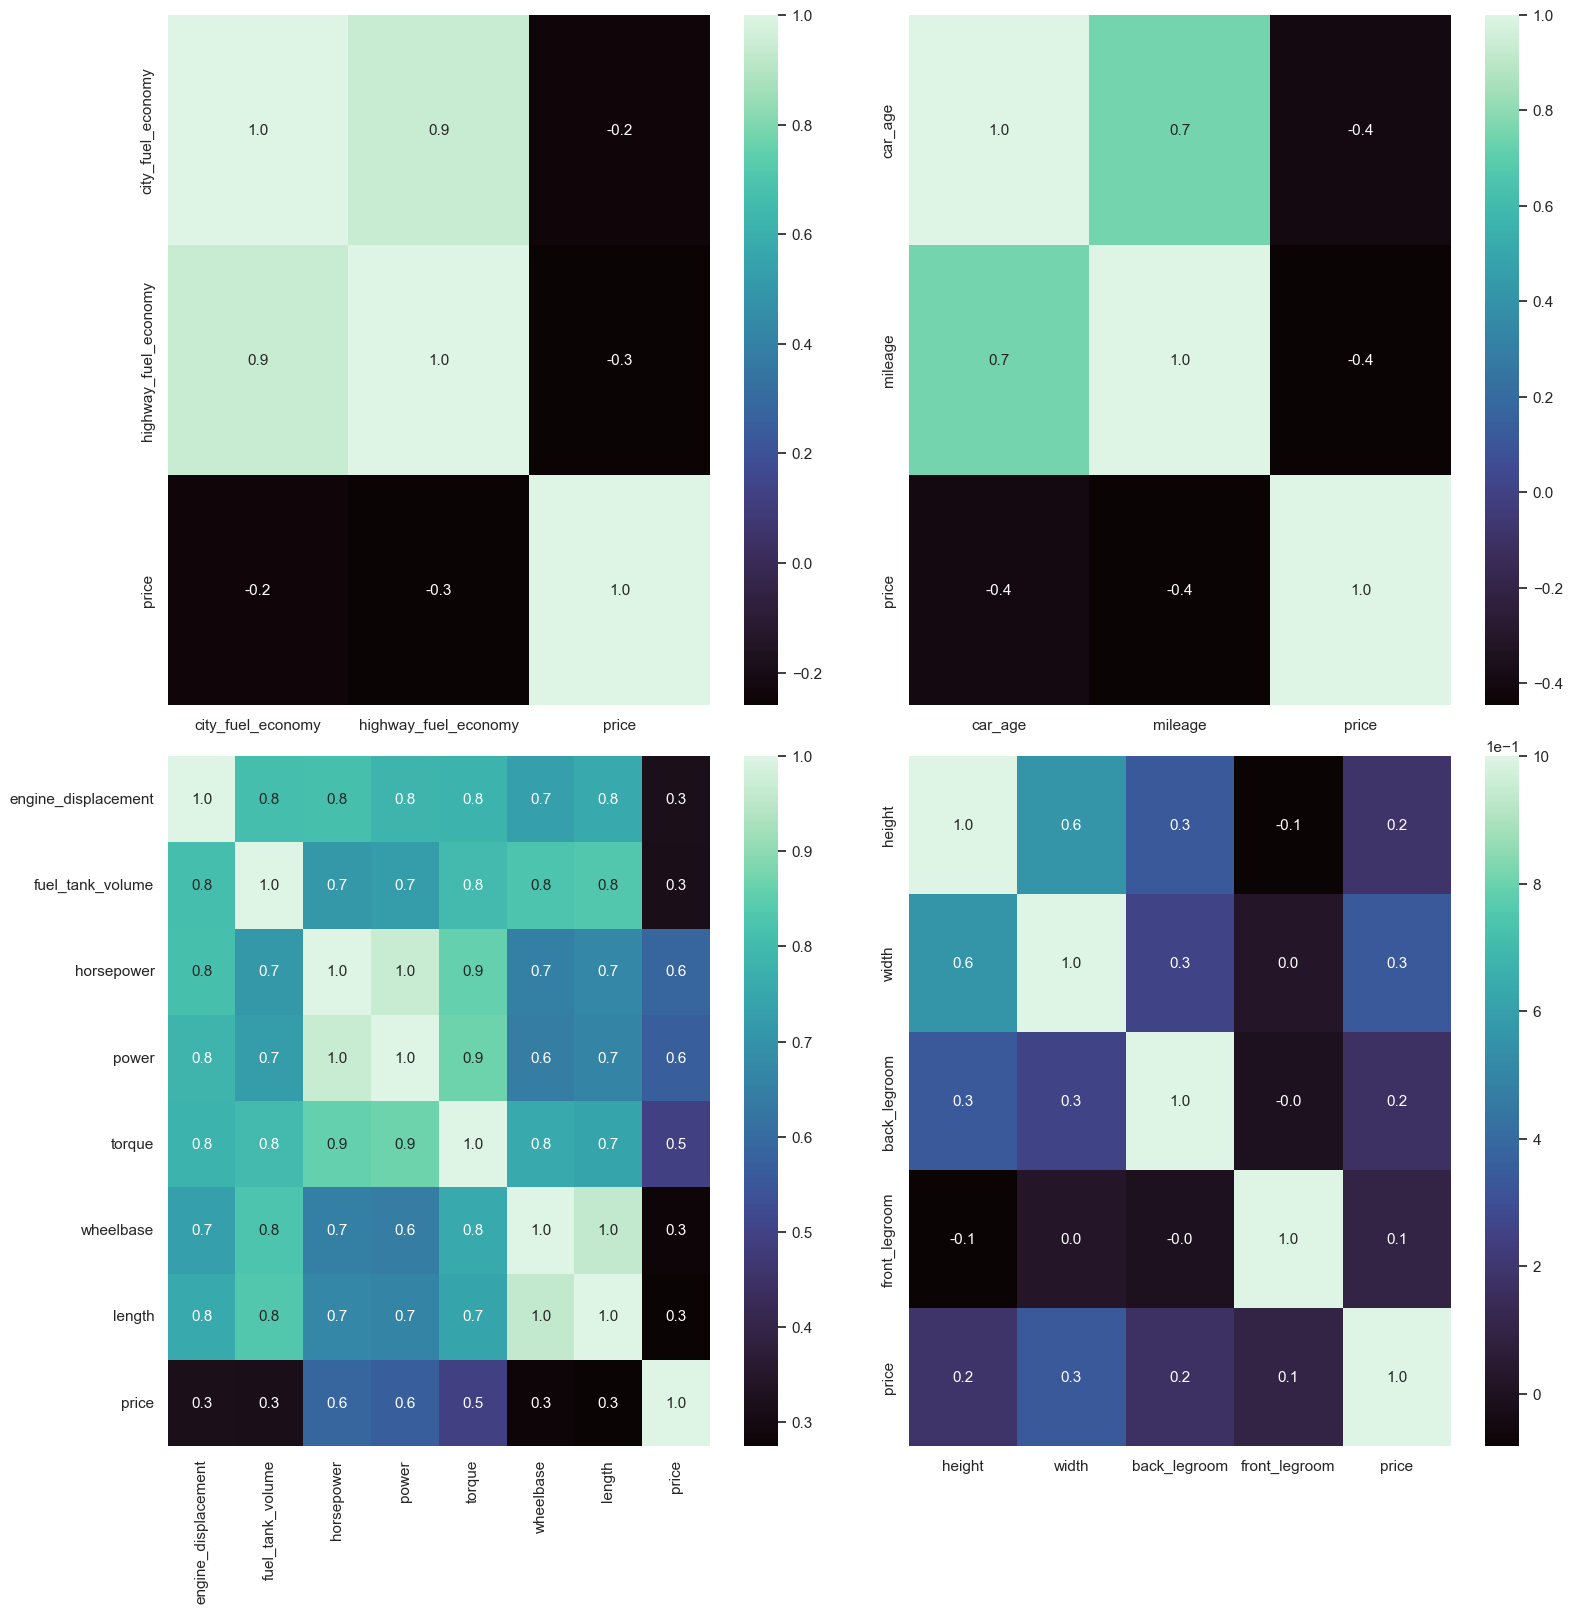

In [49]:
f, axes = plt.subplots(2, 2, figsize=(15, 15))
sb.set_theme("notebook", "darkgrid", font_scale=1)
f.tight_layout()
sb.set(font_scale=1)
sb.heatmap(df[['city_fuel_economy', 'highway_fuel_economy', 'price']].corr(), 
           annot=True, annot_kws={"size": 11}, cmap="mako", fmt=".1f", ax=axes[0,0])

sb.heatmap(df[['car_age', 'mileage', 'price']].corr(), 
           annot=True, annot_kws={"size": 11}, cmap="mako", fmt=".1f", ax=axes[0,1])

sb.heatmap(df[["engine_displacement", "fuel_tank_volume", "horsepower", 
               "power", "torque", "wheelbase", "length", 'price']].corr(), 
           annot=True, annot_kws={"size": 11}, cmap="mako", fmt=".1f", ax=axes[1,0])

sb.heatmap(df[['height', 'width', 'back_legroom', 'front_legroom', 'price']].corr(), 
           annot=True, annot_kws={"size": 11}, cmap="mako", fmt=".1f", ax=axes[1,1])
plt.show()

## Combining Numerical Variables
We use the PCA which allows us to decrease multicollinearity of the variables.

In [50]:
from sklearn.decomposition import PCA

In [51]:
def cols_pca(cols, data, newName, n_components=1):
    pca = PCA(n_components=n_components)
    pca.fit(data[cols])
    pca_df = pd.DataFrame(data=pca.transform(data[cols]), columns=[f"{newName}_{i+1}"
                     for i in range(n_components)])
    pca_df = pca_df.set_index(data.index)
    new_col_names = [f"{newName}_{i+1}" for i in range(n_components)]
    data[new_col_names] = pca_df.copy()

Here we use the weighted average of different variables, the weight being its correlation with price.

In [52]:
def add_weighted_average_col(col_list, data, newName):
    tmp_df = data[col_list]
    #normalise the values
    tmp_df = (tmp_df-tmp_df.min())/(tmp_df.max()-tmp_df.min())
    weight = {}
    for var in col_list:
        weight[var] = data[[var, 'price']].corr().iloc[0,1]
    data[newName] = 0
    for var in col_list:
        data[newName] += weight[var] * tmp_df[var]    
    print(f"The correlation of the new variable {newName}: ", data[[newName, 'price']].corr().iloc[0,1])

In [53]:
engineRating_list = ["engine_displacement", "fuel_tank_volume", "horsepower",
                      "power", "torque", "wheelbase", "length"]
carSpace_list = ['height', 'width', 'back_legroom', 'front_legroom']
fuelEcon_list = ['city_fuel_economy', 'highway_fuel_economy']
carUsage_list = ['car_age', 'mileage']

cols_pca(engineRating_list, df, 'pca_engine')
cols_pca(carSpace_list, df, 'avg_car_space')
cols_pca(fuelEcon_list, df, 'pca_fuel_economy')
add_weighted_average_col(carUsage_list, df, 'pca_car_usage')

The correlation of the new variable pca_car_usage:  0.45394648017638983


## Dropping less important numerical variables

In [56]:
drop_col = [
    'fuel_tank_volume', 'engine_displacement', 'torqueRPM', 'powerRPM', 
    'height', 'length', 'width', 'back_legroom', 'front_legroom',
    'city_fuel_economy', 'highway_fuel_economy', 'car_age', 'mileage', 
    'seller_rating', 'daysonmarket', 'theft_title', 'salvage', 'bed', 'cabin', 
    'franchise_dealer', 'isCab', 'fleet', 'is_new', 'is_oemcpo', 
    'transmission', 'frame_damaged', 'maximum_seating']
final_df = df.drop(columns=drop_col)
final_df.head()

## Export code as train.csv to build model

In [67]:
filename = '../Datasets/train.csv'
final_df.to_csv(filename)